
# Nonparametric Rank Correlation

本文主要结合blog--[How to Calculate Nonparametric Rank Correlation in Python](https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/)记录秩次相关的概念.

两个变量之间关系很重要的度量方式就是Correlation。当不知道两个变量的分布时，要衡量correlation就需要非参数的秩次相关法了。

## Rank Correlation

在讨论秩次相关之前，先简单回顾下correlation：

变量之间的相关系数是用来度量变量之间相关性的。计算符合高斯分布的两个变量的相关系数可以直接使用Pearson's correlation。为什么要符合正态分布？

从网上[一篇blog](https://zhuanlan.zhihu.com/p/25758439)抄来一段话：

1. 存在性：因为Pearson's correlation是通过原点矩来定义的，所以二元概率分布的总体协方差以及变量边缘总体方差必须是有意义且非零的。
2. 大样本性：在二元正态分布中，若已知变量的边缘分布的均值和标准差，那么由Pearson相关系数就可以完全确定该分布的特性。言外之意，就是说服从正态分布才行。不论变量之间的联合概率密度函数是不是正态的，Pearson相关系数都是用来衡量两个随机变量之间的线性相关程度的。对于二元正态数据，样本的相关系数是总体相关系数的极大似然估计，并且具有渐进无偏性和有效性，也即是说在数据来自正态分布，且样本大小适中或是足够大的时候，不可能构造一个比样本相关相关系数更加精确的量来估计变量之间的相关性。对于非正态总体，样本相关系数依然是渐进无偏的，但是可能不是有效的估计。只要样本均值、方差、协方差是一致的（可以通过应用大数定律来保证），样本相关系数是总体相关系数的一个一致估计量。

总之，服从正态分布的数据计算出的相关系数，结果是可靠的。而不服从正态分布的呢？也可以用来计算，但不一定正确。于是满足正态性、方差齐、大样的数据更适用Pearson系数。该系数受资料分布的影响，还对对异常值敏感，因此检验资料的适用性很重要。

那么不服从从正态分布怎么办？就要用非参数检验了，但是这也依赖于数据的互换性，在没有特定的顺序或是数据可供分析时，可能影响相关估计的行为。

因为没有假设数据的分布，所以秩次相关是一种非参数相关分析方法。它是指对变量数值排序后，顺序数之间的相关性。是ordinal relationship。ordinal data之间的relationship。

秩次相关经常作为其他假设检验的基础。比如判断两个样本是否可能来自相同(或不同)的总体分布。

有两种最常用的方法：

- Spearman’s Rank Correlation.
- Kendall’s Rank Correlation.

## 例子

两个服从均匀分布的变量 (non-Gaussian) 


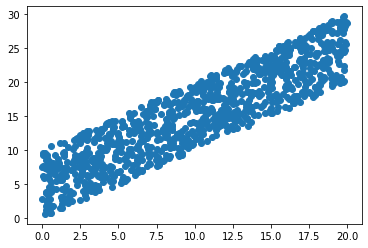

In [1]:
# generate related variables
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
# rand函数生成0-1之间服从均匀分布的随机数，*20表示将数据scale到[0,20]范围内。
data1 = rand(1000) * 20
# 为了建立两组随机变量之间的关系，将一组随机生成的[0,10]之间的数据add到data1上。
data2 = data1 + (rand(1000) * 10)
# plot
pyplot.scatter(data1, data2)
pyplot.show()


## Spearman's Rank Correlation

也可以称为Spearman's correlation coefficient，用小写希腊字母rho表示，称作Spearman's rho.

Spearman rank-order correlation  是一种用来衡量两组变量关系的统计过程。计算公式如下：

$\rho=\frac{\Sigma_i (x_i-\bar x)(y_i-\bar y)}{\sqrt{\Sigma_i(x_i-\bar x)^2(y_i-\bar y)^2} }$

在假设检验中，先假设两组变量无关（零假设H0）。然后通过计算Spearman rho和对应的概率来判断是否拒绝假设。

在python中，可直接使用sklearn库的相关函数。



In [3]:
from scipy.stats import spearmanr
# calculate spearman's correlation
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.900
Samples are correlated (reject H0) p=0.000


如代码所示，计算得到的相关性恨到，概率为0，所以可以拒绝零假设，即变量相关。

## Kendall's Rank Correlation

和Spearman's类似，Kendall秩次相关也可以称为Kendall's correlation coefficient, 用小写希腊字母tau表示，也称作Kendall's tau。

其计算方式为：

$\tau=\frac{顺序一致的数据的组数-不一致的组数}{C_n^2}$


In [4]:
from scipy.stats import kendalltau
# calculate kendall's correlation
coef, p = kendalltau(data1, data2)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Kendall correlation coefficient: 0.709
Samples are correlated (reject H0) p=0.000
